In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* We use a simple logistical regression with polynomial features and a small regularization (lambda = 0.0001) to get around numerical rounding problems

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.

* We determine, for each gear type, what the optimal degree of the polynomial is by running the regression for each degree of polynomial with a fixed window size.

* We can't easily automatically derive the grade of the polynomial from the regression over polynomial length, since the graph only flattens out, it doesn't have a minima, so it's a judgement call what is "good enough". Therefore the grade parameter has been hard-coded below, after examining the graph for grade vs cross validation error.

# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.181957696572, cross=0.156329588081
3600: Fitting... Scoring... Calc.err... train=0.178863917477, cross=0.154968980963
10800: Fitting... Scoring... Calc.err... train=0.163807474496, cross=0.140850420926
21600: Fitting... Scoring... Calc.err... train=0.151306212321, cross=0.1248611491
43200: Fitting... Scoring... Calc.err... train=0.139525585361, cross=0.121915255749
86400: Fitting... Scoring... Calc.err... train=0.14908988253, cross=0.136687240516


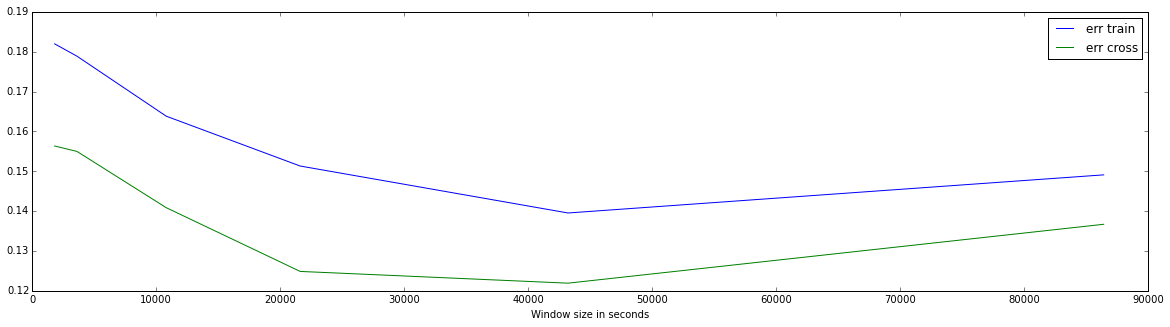

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.151652355974, cross=0.151355920338
3: Fitting... Scoring... Calc.err... train=0.142239656425, cross=0.12462751918
4: Fitting... Scoring... Calc.err... train=0.139525555929, cross=0.121914615692
5: Fitting... Scoring... Calc.err... train=0.139171359824, cross=0.122095965705
6: Fitting... Scoring... Calc.err... train=0.136061261699, cross=0.119716320389
7: Fitting... Scoring... Calc.err... train=0.13566256251, cross=0.120511527371
8: Fitting... Scoring... Calc.err... train=0.135801030866, cross=0.119617156677
9: Fitting... Scoring... Calc.err... train=0.503962568449, cross=0.335880355916


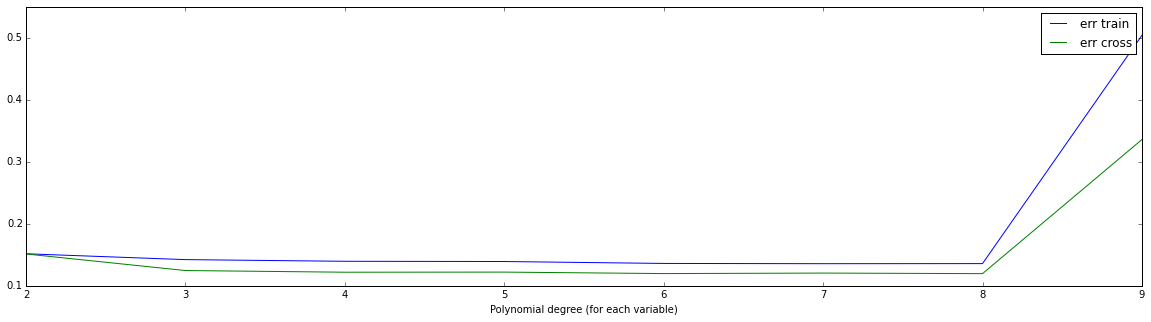

Evaluation using Alex' data:


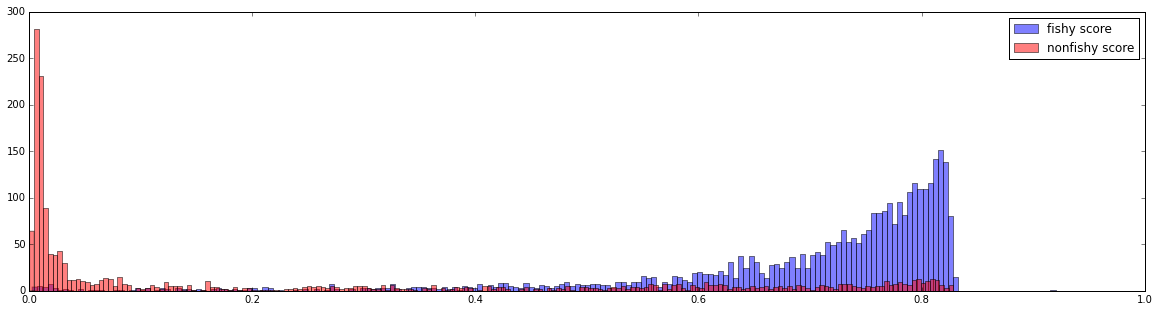

Squared numerical error: 0.110725064841
Error (overlap): 18.56%
Error (overlap) above cutoff of 0.5: 15.8947970269%
For cutoff of 0.5
True positives 2823
False positives 399
True negatives 1235
False negatives 232
accuracy 0.8116
precision 0.876163873371
recall 0.924058919804


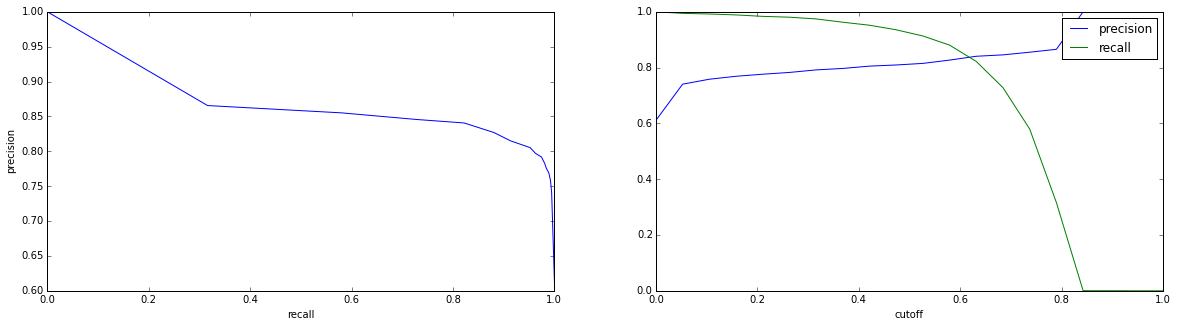

Score window: 43200
Score polynomial: [  0.14554806 -22.02926923  23.42367662  25.60712574 -33.99102549
   0.14554806  -7.96552783  -6.23241928  -1.57036363  -0.12941383
   0.14554806  -4.44883565  -3.87473835   0.33287607   0.40490399]
Evaluate using Kristinas data:


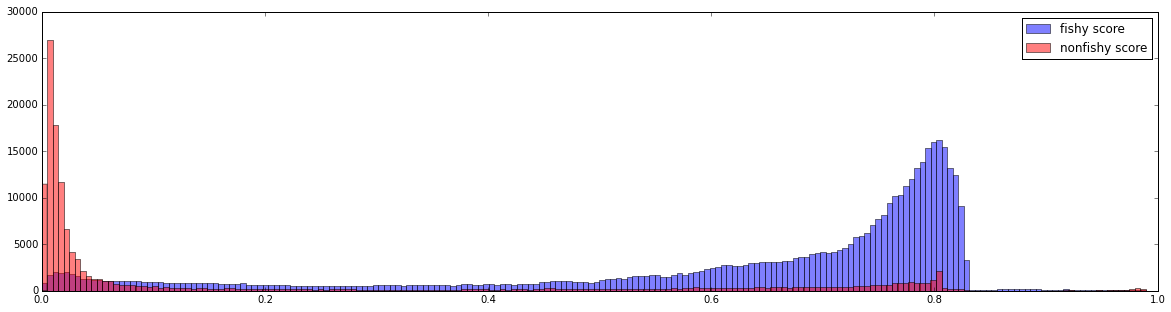

Squared numerical error: 0.168876896484
Error (overlap): 23.3578693038%
Error (overlap) above cutoff of 0.5: 15.3431502844%
For cutoff of 0.5
True positives 348009
False positives 29480
True negatives 108999
False negatives 83016
accuracy 0.802466707872
precision 0.921905009153
recall 0.80739864277


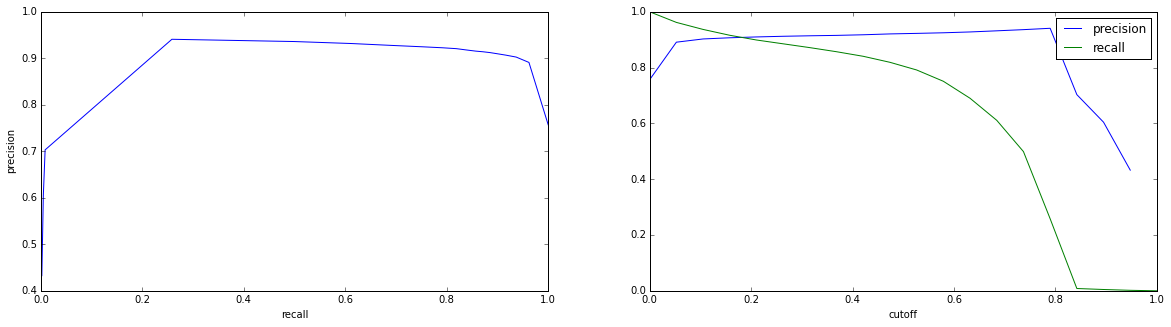

Score window: 43200
Score polynomial: [  0.1456363  -22.02999146  23.42419398  25.60734762 -33.99115973
   0.1456363   -7.96525803  -6.23214923  -1.57026762  -0.12940461
   0.1456363   -4.44897239  -3.87493526   0.33278277   0.4048904 ]


In [2]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, 5, min_window)
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, _x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.alex-scores.npz", x=_x.filled())

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.129935118968, cross=0.227381842314
3600: Fitting... Scoring... Calc.err... train=0.125530241865, cross=0.221620244981
10800: Fitting... Scoring... Calc.err... train=0.113306059989, cross=0.198439344204
21600: Fitting... Scoring... Calc.err... train=0.107865488311, cross=0.190920445147
43200: Fitting... Scoring... Calc.err... train=0.0910935042392, cross=0.186382587263
86400: Fitting... Scoring... Calc.err... train=0.103834165197, cross=0.193831078506


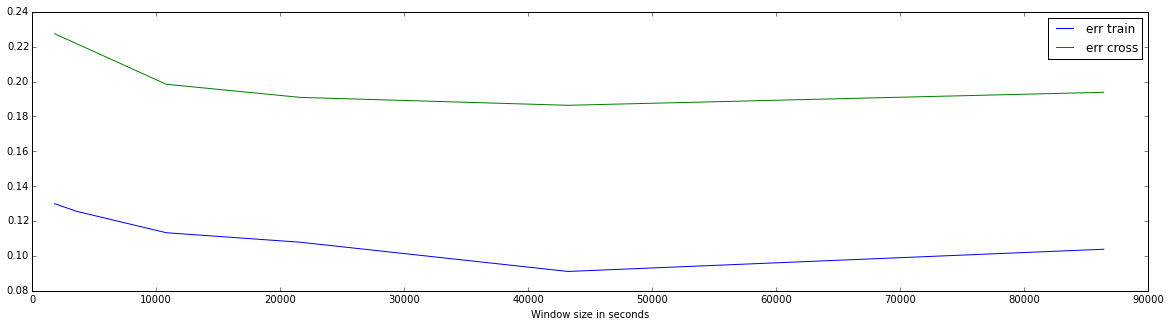

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.107570263532, cross=0.237835340406
3: Fitting... Scoring... Calc.err... train=0.105522721635, cross=0.236772712762
4: Fitting... Scoring... Calc.err... train=0.0910935044145, cross=0.186382496296
5: Fitting... Scoring... Calc.err... train=0.0881026172903, cross=0.168719087207
6: Fitting... Scoring... Calc.err... train=0.087852750437, cross=0.164190017214
7: Fitting... Scoring... Calc.err... train=0.0877660515846, cross=0.168745216419
8: Fitting... Scoring... Calc.err... train=0.0882853557042, cross=0.179825231761
9: Fitting... Scoring... Calc.err... train=0.0879066427511, cross=0.170279475759


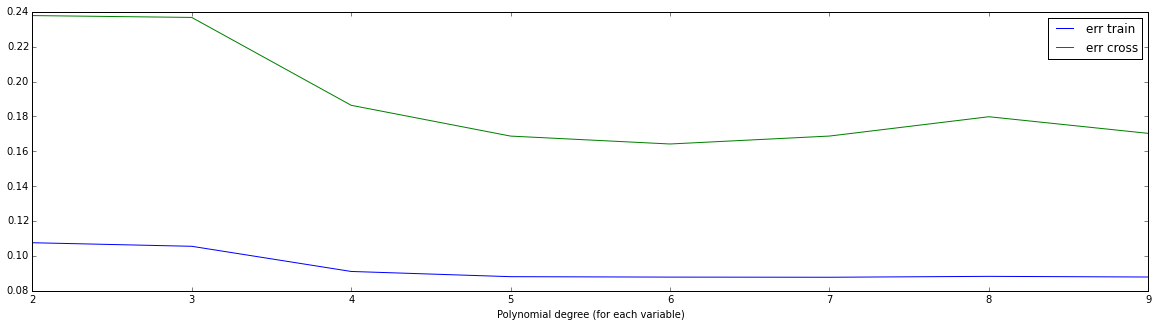

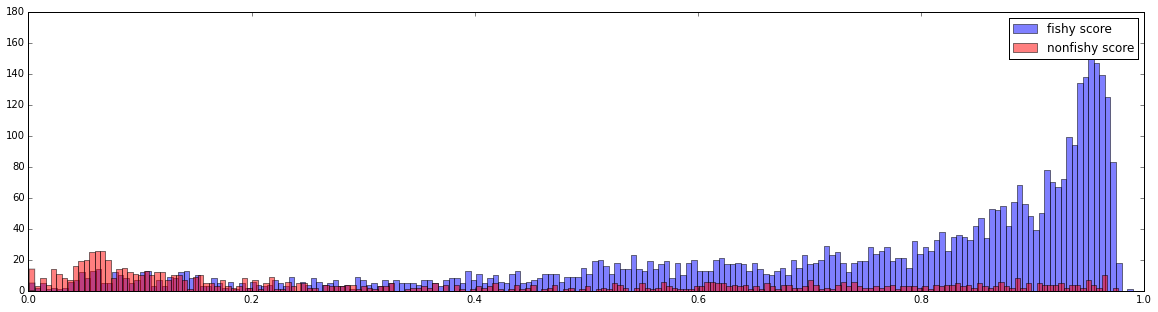

Squared numerical error: 0.146623860141
Error (overlap): 26.96%
Error (overlap) above cutoff of 0.5: 16.5469539771%
For cutoff of 0.5
True positives 3447
False positives 310
True negatives 579
False negatives 664
accuracy 0.8052
precision 0.917487356934
recall 0.838482121138


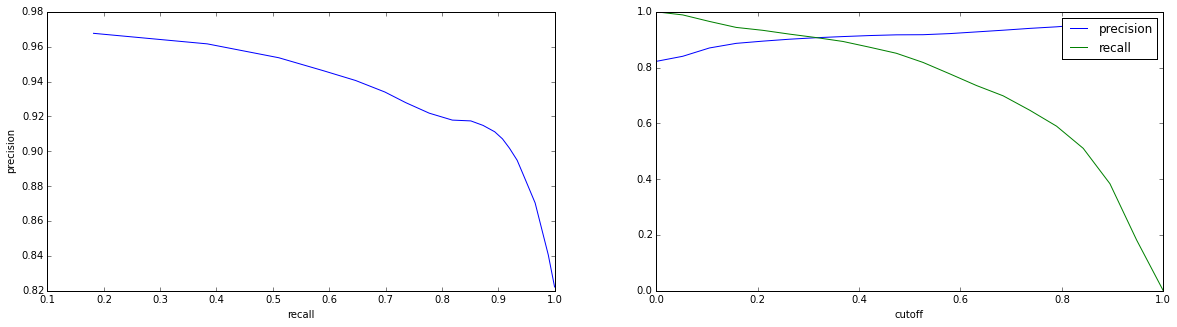

Score window: 43200
Score polynomial: [  -4.0318481    22.91414265 -118.9311326   230.54827988 -136.70466082
   -4.03184813  -34.7214185   -34.32094955  -13.87441759   -1.95590336
   -4.03184811    1.99578806    0.39049597    0.88791156    0.28263982]


In [3]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.kristina-scores.npz", x=x.filled())

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

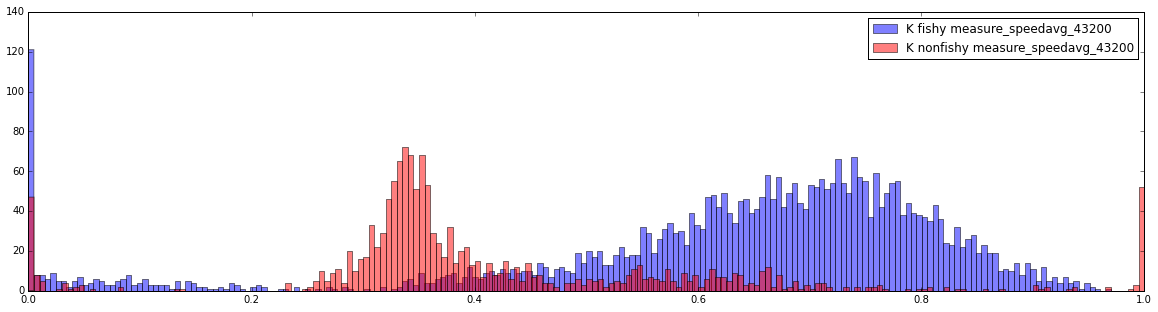

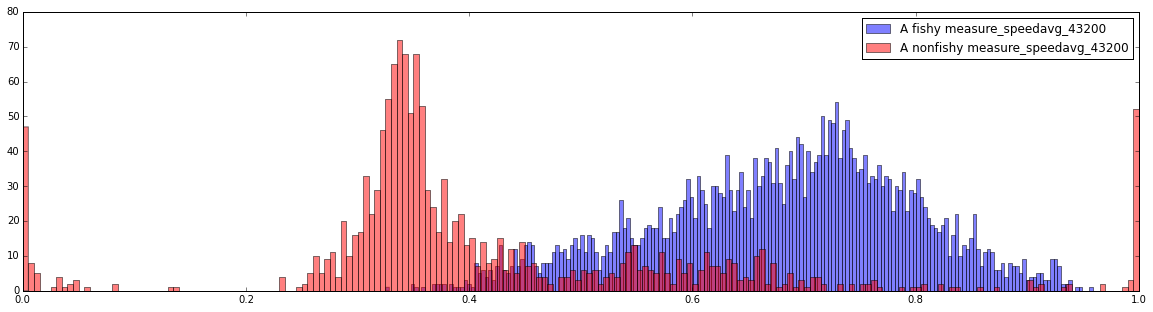

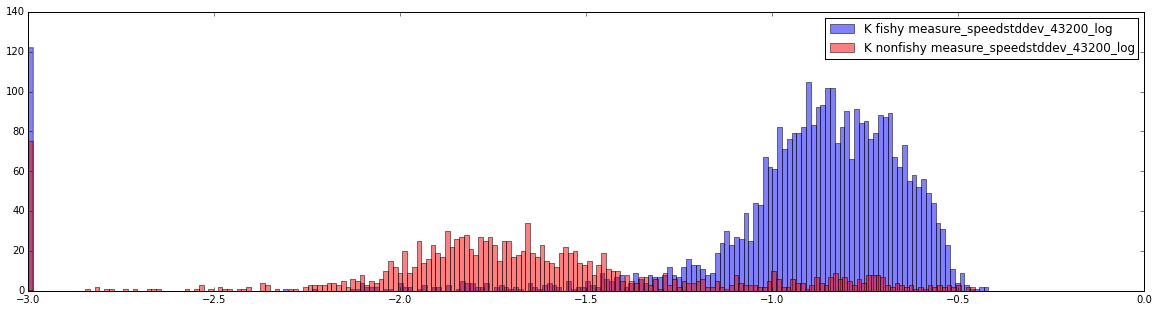

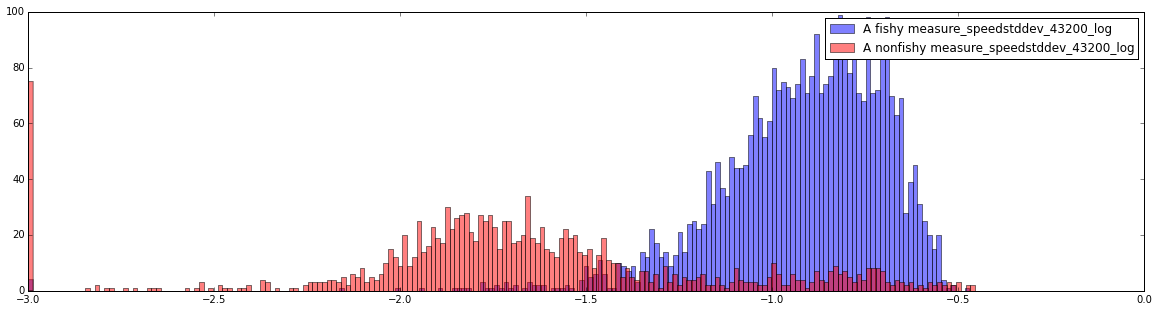

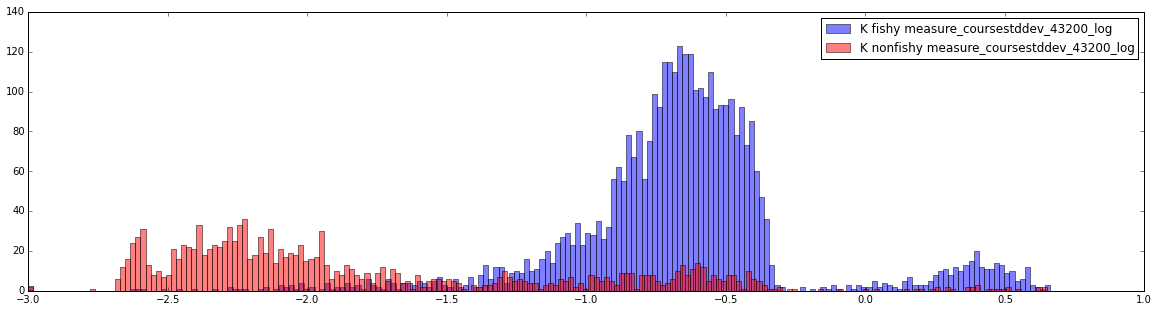

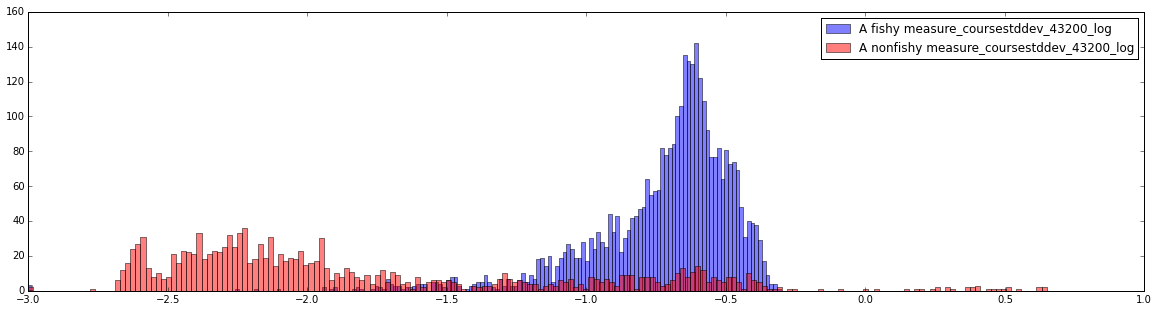

In [4]:
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.136188297429, cross=0.116396886969
3600: Fitting... Scoring... Calc.err... train=0.135141391378, cross=0.114755866271
10800: Fitting... Scoring... Calc.err... train=0.133033091198, cross=0.11775890773
21600: Fitting... Scoring... Calc.err... train=0.135481096139, cross=0.122945834555
43200: Fitting... Scoring... Calc.err... train=0.151483313897, cross=0.136126909973
86400: Fitting... Scoring... Calc.err... train=0.164316326116, cross=0.154410253296


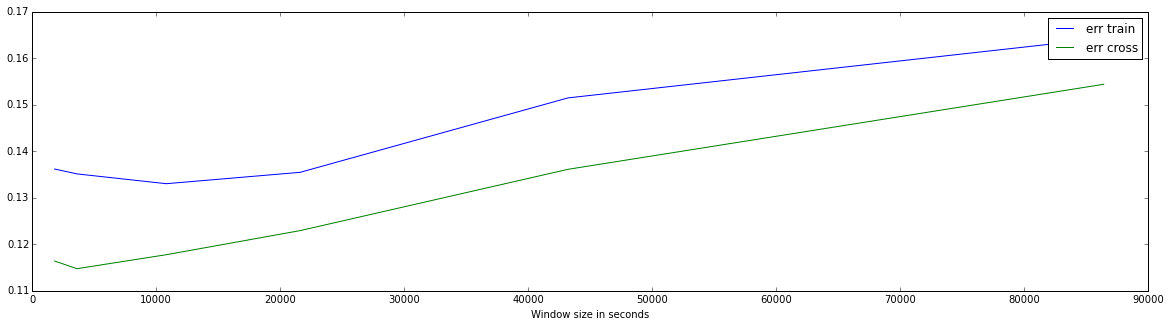

Best window size: 3600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.181175245698, cross=0.16561792146
3: Fitting... Scoring... Calc.err... train=0.149712815297, cross=0.12553830952
4: Fitting... Scoring... Calc.err... train=0.135141387512, cross=0.114755808051
5: Fitting... Scoring... Calc.err... train=0.130872704172, cross=0.114137411354
6: Fitting... Scoring... Calc.err... train=0.130621469371, cross=0.114101555637
7: Fitting... Scoring... Calc.err... train=0.499647392601, cross=0.274073025382
8: Fitting... Scoring... Calc.err... train=0.455413620032, cross=0.551697174259
9: Fitting... Scoring... Calc.err... train=0.499693401724, cross=0.274206905607


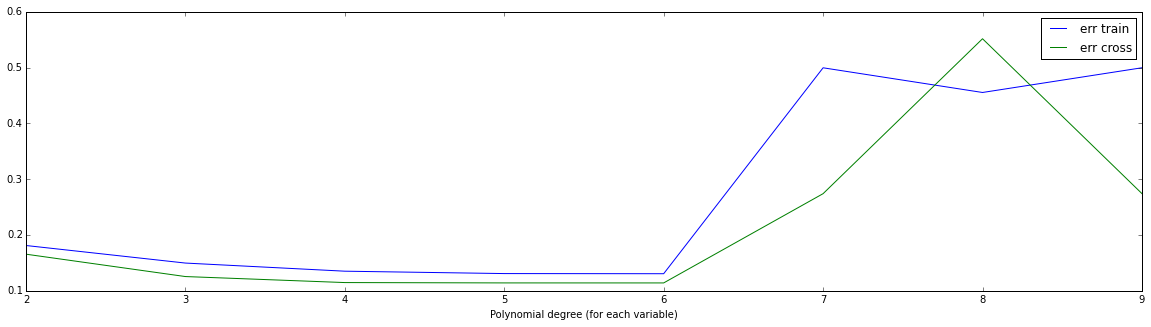

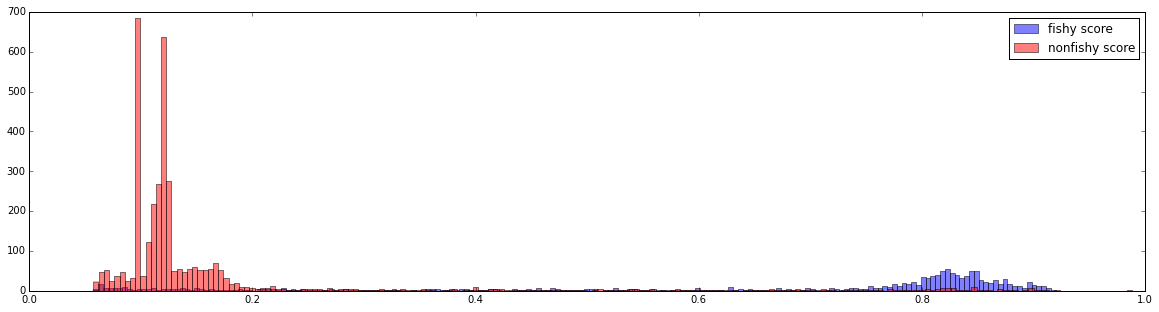

Squared numerical error: 0.0874377656148
Error (overlap): 18.4%
Error (overlap) above cutoff of 0.5: 26.7405063291%
For cutoff of 0.5
True positives 1075
False positives 208
True negatives 3366
False negatives 351
accuracy 0.8882
precision 0.837879968823
recall 0.753856942496


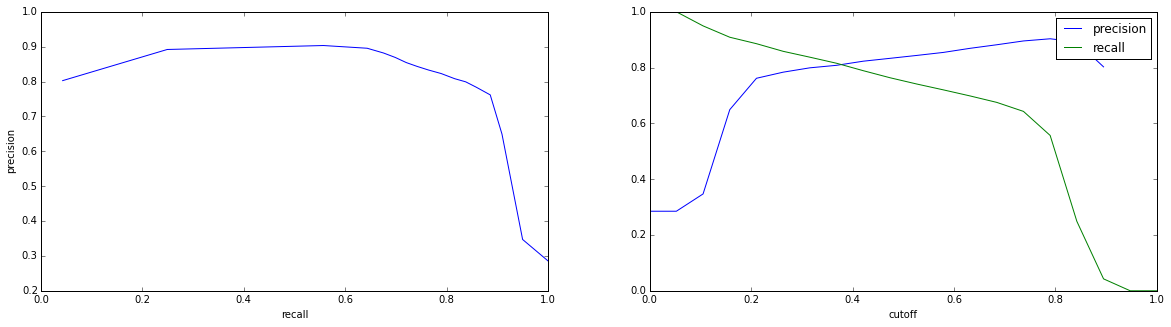

Score window: 3600
Score polynomial: [  3.02348713e+00  -7.97360522e+01   1.67013799e+02  -9.86062540e+01
   3.02348713e+00   2.51840831e-01   7.72440443e-02   1.43959386e-02
   3.02348713e+00  -2.25996550e+00  -1.74137274e+00  -3.47022461e-01]


In [5]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 4, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 4, min_window)
numpy.savez_compressed("datasets/kristina_trawl.scores.npz", x=x.filled())

# Purse seiners

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.122469673309, cross=0.282492066184
3600: Fitting... Scoring... Calc.err... train=0.120921533841, cross=0.267732426911
10800: Fitting... Scoring... Calc.err... train=0.126120622092, cross=0.230909395984
21600: Fitting... Scoring... Calc.err... train=0.136446652371, cross=0.226364515405
43200: Fitting... Scoring... Calc.err... train=0.174698887004, cross=0.26940467704
86400: Fitting... Scoring... Calc.err... train=0.195143209444, cross=0.22684562585


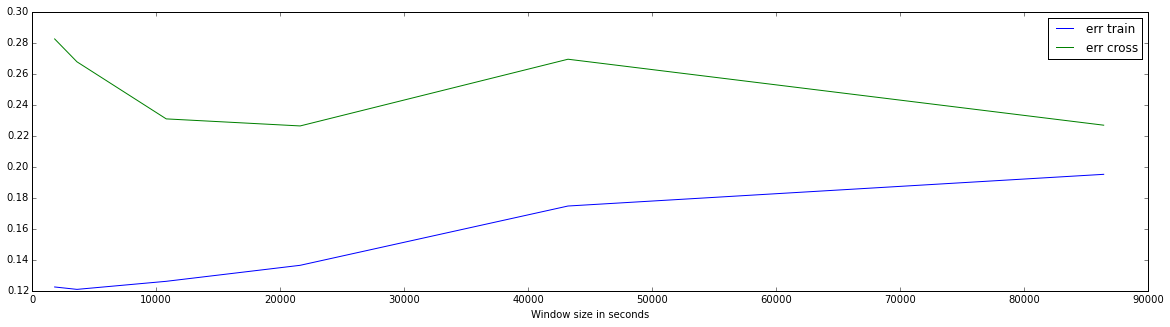

Best window size: 21600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.139628418289, cross=0.212306119139
3: Fitting... Scoring... Calc.err... train=0.137292079017, cross=0.225009202646
4: Fitting... Scoring... Calc.err... train=0.136446641673, cross=0.226364431767
5: Fitting... Scoring... Calc.err... train=0.267155647475, cross=0.0937935719546
6: Fitting... Scoring... Calc.err... train=0.132639367545, cross=0.206754211289
7: Fitting... Scoring... Calc.err... train=0.289847589521, cross=0.131743540807
8: Fitting... Scoring... Calc.err... train=0.132151594681, cross=0.209873958629
9: Fitting... Scoring... Calc.err... train=0.245102311991, cross=0.118667729705


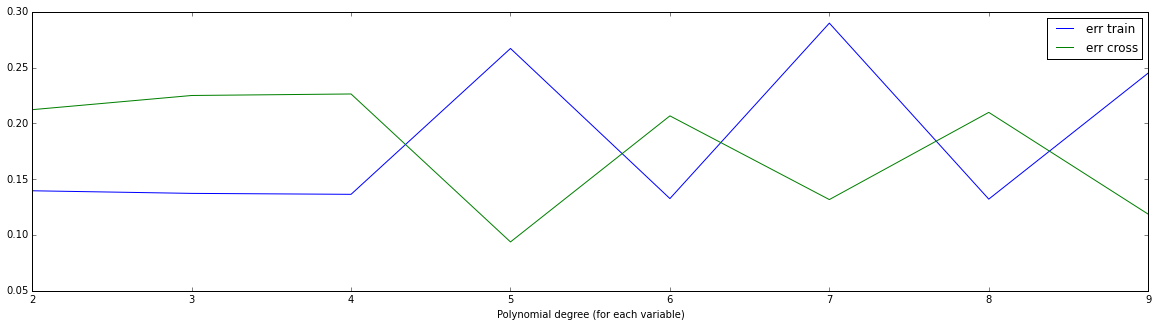

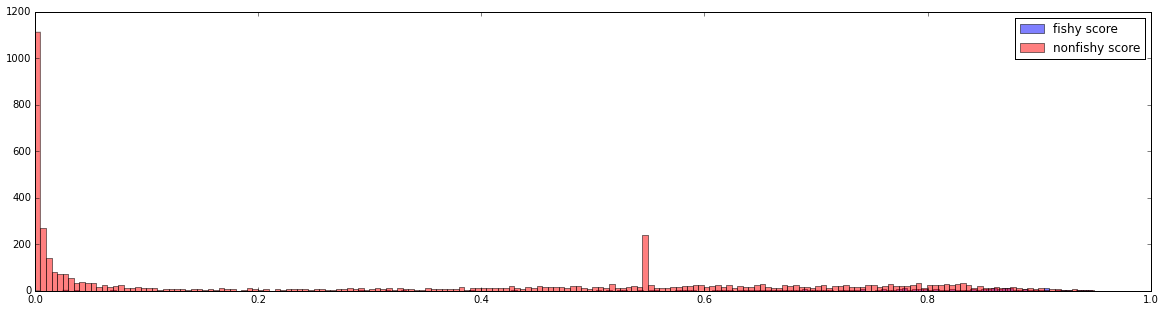

Squared numerical error: 0.203152039344
Error (overlap): 14.56%
Error (overlap) above cutoff of 0.5: 30.131826742%
For cutoff of 0.5
True positives 342
False positives 1794
True negatives 2820
False negatives 44
accuracy 0.6324
precision 0.160112359551
recall 0.886010362694


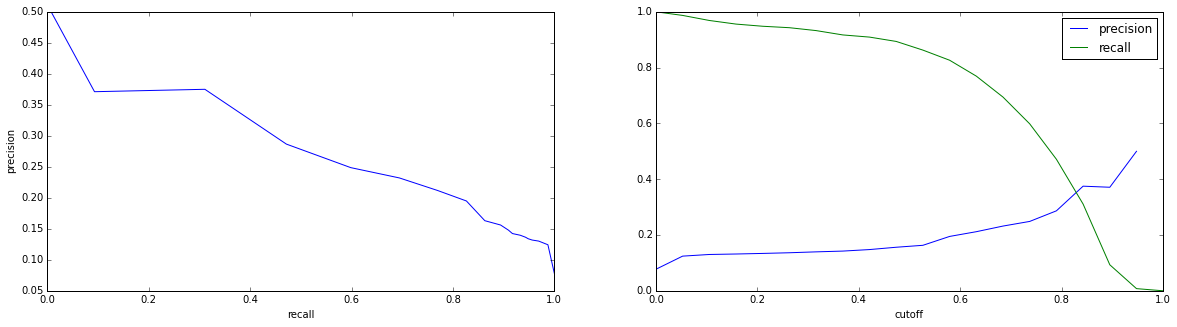

Score window: 21600
Score polynomial: [ -7.34779336  18.60795446 -16.18354335  -5.23669334   7.50604432
   4.55037396  -7.34779336 -44.37280711 -78.57740128 -59.90699821
 -20.80094271  -2.64348726  -7.34779336 -43.17068706 -73.29112654
 -55.13712237 -18.88560128  -2.40013614]


In [6]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 6, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_ps.scores.npz", x=x.filled())

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0467521285291, cross=0.0440881807882
3600: Fitting... Scoring... Calc.err... train=0.0460925542609, cross=0.0459505983636
10800: Fitting... Scoring... Calc.err... train=0.0473529829057, cross=0.0430966811885
21600: Fitting... Scoring... Calc.err... train=0.046732008049, cross=0.0442935238984
43200: Fitting... Scoring... Calc.err... train=0.0492052445472, cross=0.0453147012264
86400: Fitting... Scoring... Calc.err... train=0.0496849908926, cross=0.0459009324338


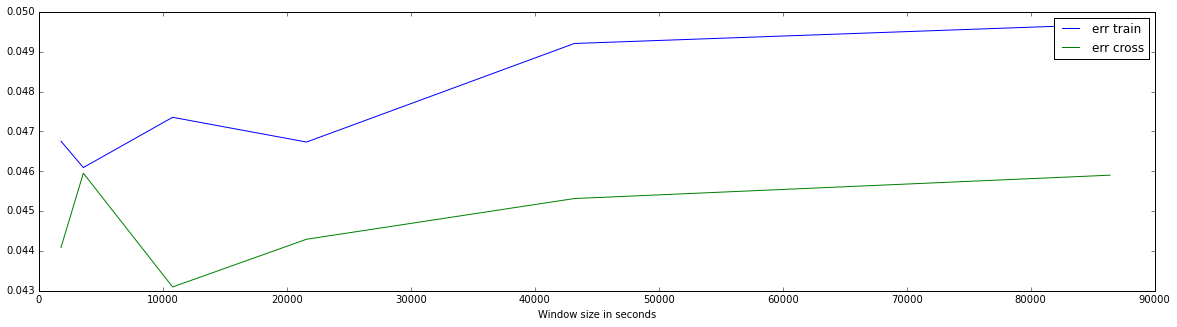

Best window size: 10800
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0494248031424, cross=0.0422257790425
3: Fitting... Scoring... Calc.err... train=0.0480680783138, cross=0.0424746957777
4: Fitting... Scoring... Calc.err... train=0.0473529809535, cross=0.0430966446776
5: Fitting... Scoring... Calc.err... train=0.0470070244805, cross=0.0449709626542
6: Fitting... Scoring... Calc.err... train=0.0465302655765, cross=0.0450287352784
7: Fitting... Scoring... Calc.err... train=0.0462938615538, cross=0.0454418226862
8: Fitting... Scoring... Calc.err... train=0.0467399474315, cross=0.0452907998051
9: Fitting... Scoring... Calc.err... train=0.0470186587875, cross=0.043241776422


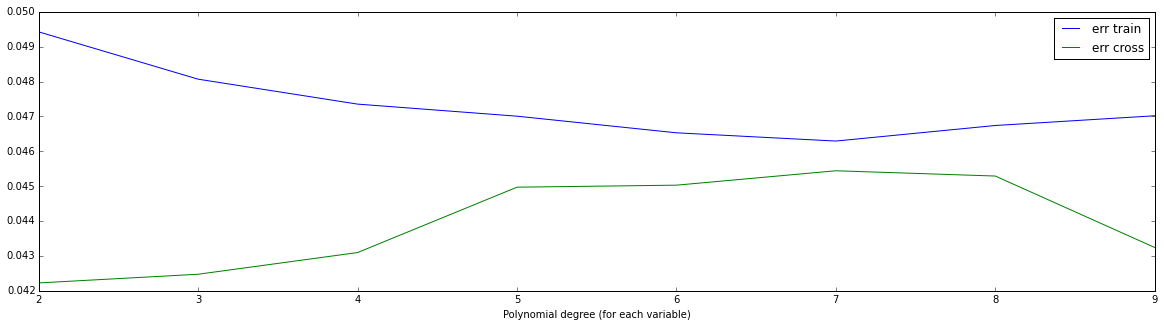

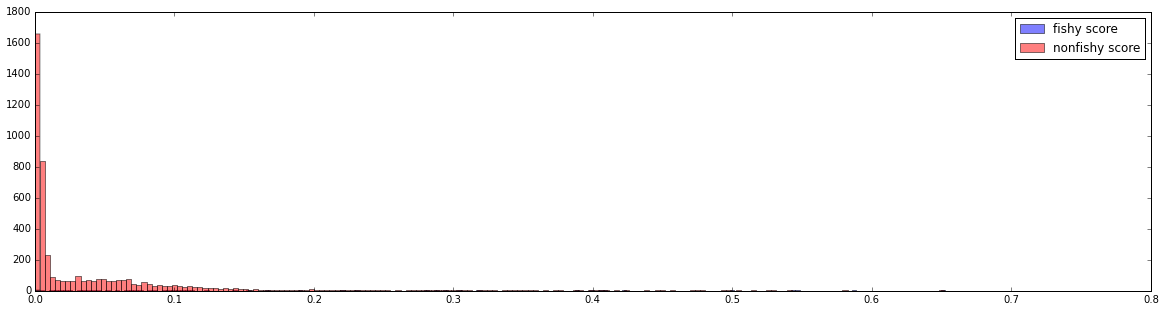

Squared numerical error: 0.0355001144289
Error (overlap): 6.96%
Error (overlap) above cutoff of 0.5: 38.0952380952%
For cutoff of 0.5
True positives 23
False positives 38
True negatives 4768
False negatives 171
accuracy 0.9582
precision 0.377049180328
recall 0.118556701031


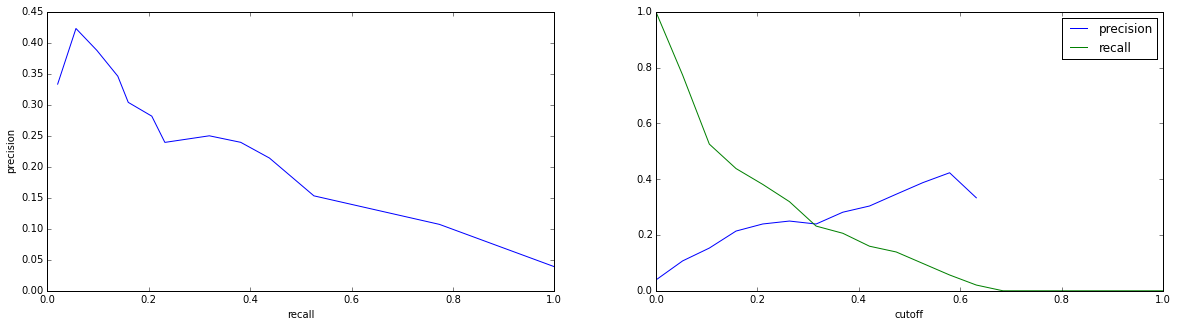

Score window: 10800
Score polynomial: [ -8.33658648e+00   1.58218371e+02  -2.88137982e+02   7.05689060e+01
   2.84452687e+02  -1.98001504e+02  -8.33658643e+00   1.66146130e+01
   1.22696427e+01   3.25855589e+00  -3.24055906e-02  -8.77877202e-02
  -8.33658642e+00  -2.65500429e-01   7.49140145e+00   9.47967432e+00
   3.98364921e+00   5.48099566e-01]


In [7]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz', matched=False)
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 6, min_window)